# IMPLEMENTACION REGRESION LINEAL.
Se trabaja con los datos del archivo "spotify_churn_dataset.csv". En el hay informacion sobre el uso de los usuarios de la aplicacion Spotify (8000 usuarios) junto con informacion de los propios usuarios.
El objetivo es tratar de encontrar una relación entre los datos de los que disponemos y gracias a esa relación, crear un modelo que prediga una columna clase.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En primer lugar, se cargaran los datos de entrada del fichero "spotify_churn_dataset.csv". Dicho fichero tiene 12 columnas y 8000 filas.

In [3]:
def read_file(file_name):
    # Reading file with data
    print('Loading Data ...', file_name)
    
    file = pd.read_csv(file_name)

    # names=["user_id","gender","age","country","subscription_type","listening_time","songs_played_per_day","skip_rate","device_type","ads_listened_per_week","offline_listening","is_churned"]

    return file

In [4]:
file = read_file('spotify_churn_dataset.csv')
file.shape

Loading Data ... spotify_churn_dataset.csv


(8000, 12)

Una vez cargados los datos, se intentará probar la relación entre diferentes columnas de forma visual. Se probará a comparar 2 columnas que pudieran tener una relación para ver si esto es verdad.
Se va a empezar por probar si la columna edad y tiempo de escucha tienen algun tipo de relación.

In [5]:
# Para X = "age" y para y = "listening_time"
X = pd.DataFrame({"age":file["age"]})
y = pd.DataFrame({'listening_time': file['listening_time']})

#X.sort_values("age", ascending = False).head()
y.sort_values("listening_time", ascending = False).head()

,listening_time
5623,299
5617,299
5732,299
863,299
2957,299


El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 54  |  26
	 33  |  141
	 38  |  199
	 22  |  36
	 29  |  250


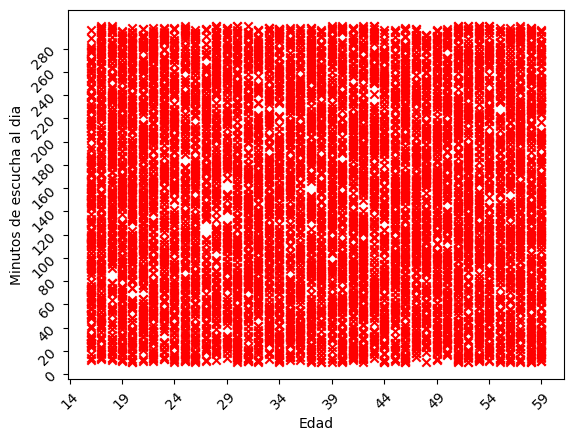

In [6]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['age'][i],  " | ", y['listening_time'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("Edad")
plt.ylabel("Minutos de escucha al dia")
plt.xticks(np.arange(14, 61, 5), rotation=45) 
plt.yticks(np.arange(0, 300, 20), rotation=45)
#plt.xlim(0,8000) # Estamos limitando el eje x. Si los datos cambian, probablemente habrá que modificar estos valores
#plt.ylim(10,100) # Estamos limitando el eje y. Si los datos cambian, probablemente habrá que modificar estos valores
plt.show()

Text(0.5, 1.0, 'Grafico sumatorio')

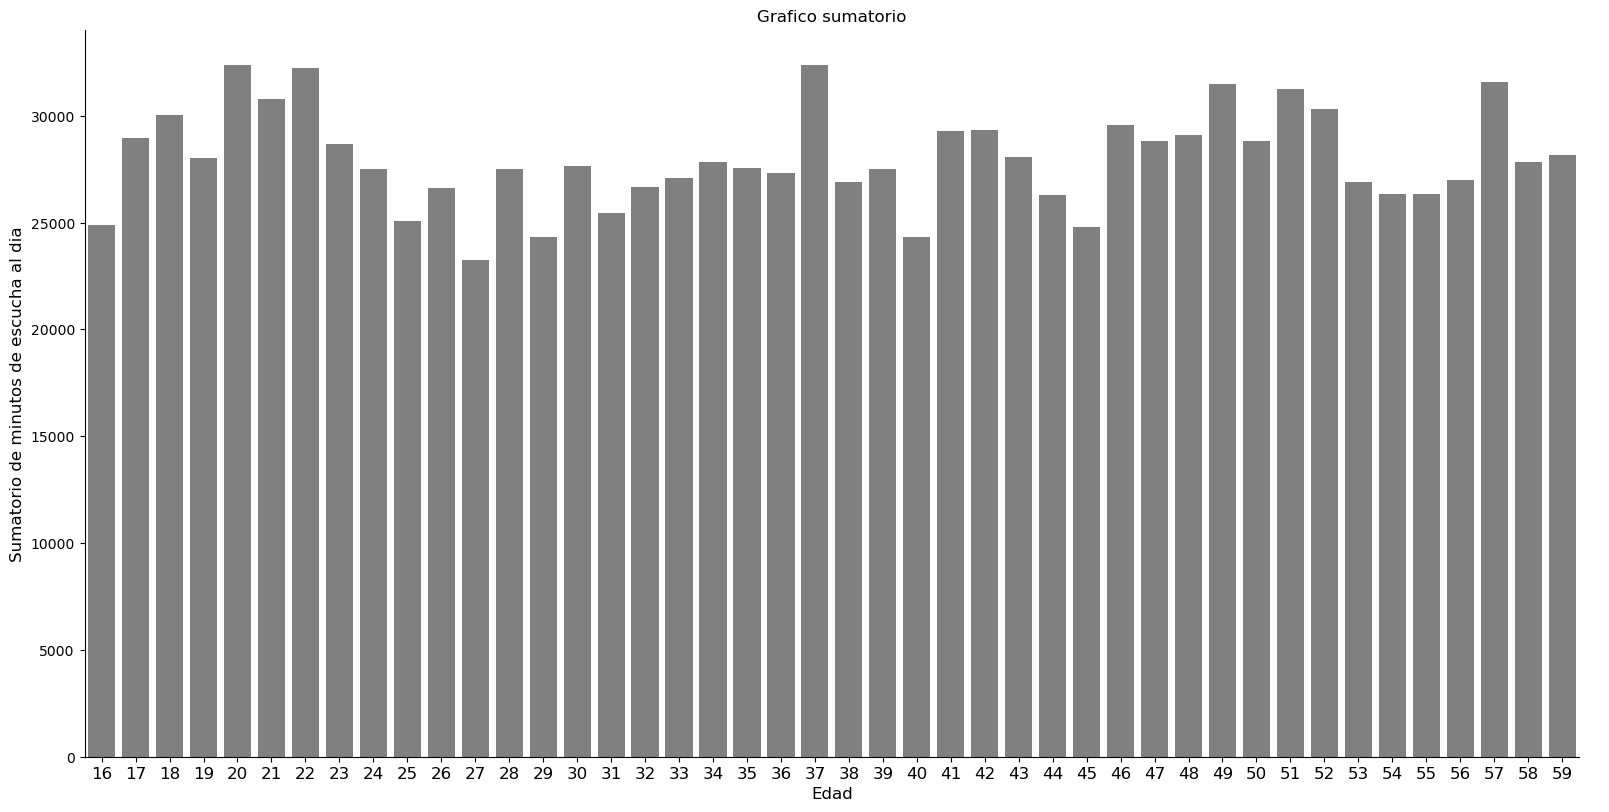

In [12]:
sns.catplot(x="age", y="listening_time", data=file, color="grey", kind="bar", height=8, aspect=2, errorbar=None, estimator="sum")
plt.xticks(size=12)
plt.xlabel("Edad", size=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Sumatorio de minutos de escucha al dia", size=12)
plt.title("Grafico sumatorio")

Text(0.5, 1.0, 'Grafico media')

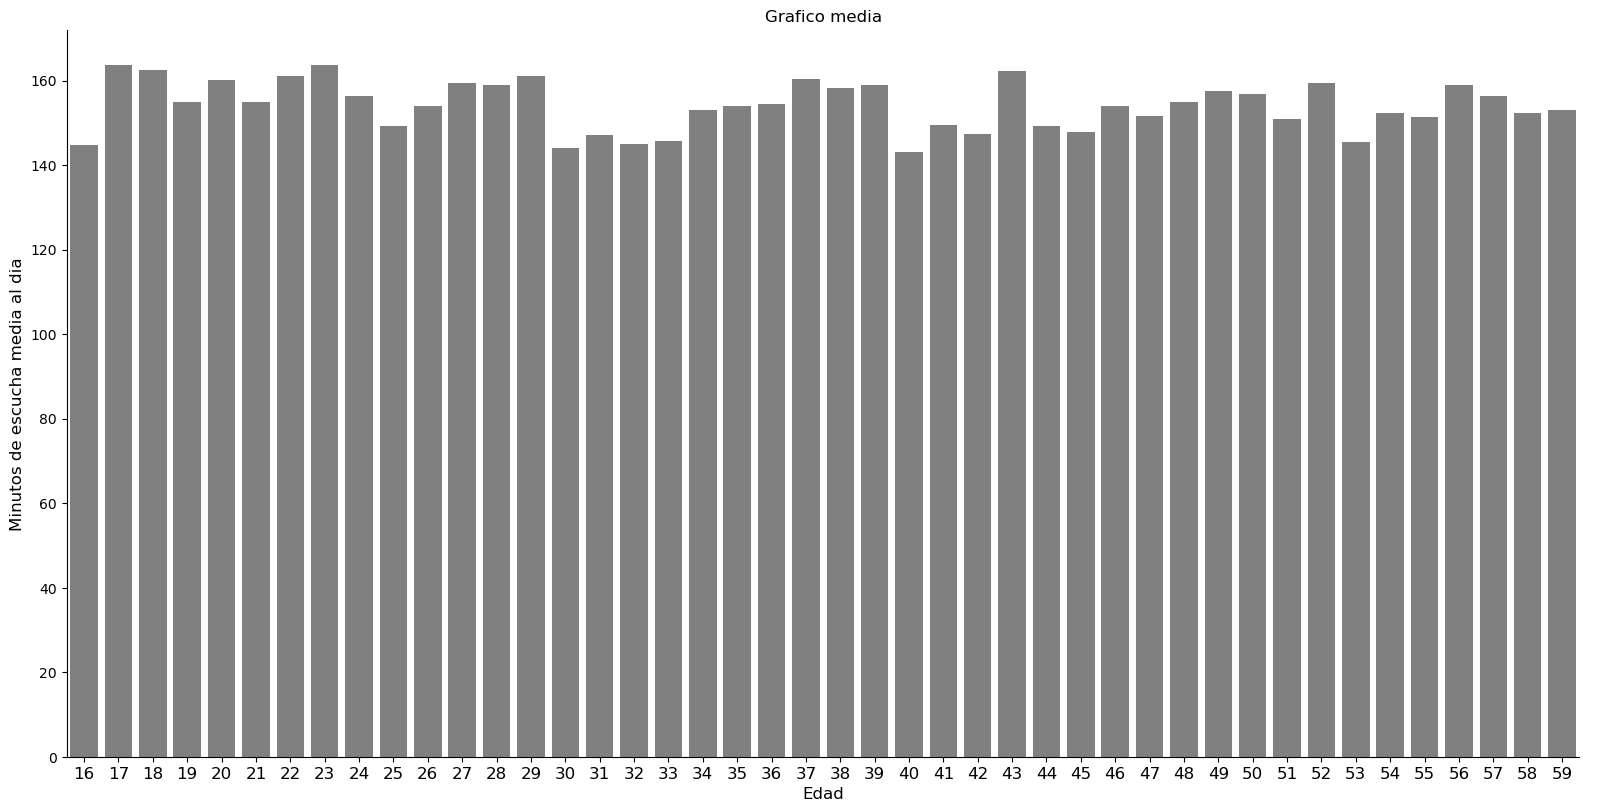

In [11]:
sns.catplot(x="age", y="listening_time", data=file, color="grey", kind="bar", height=8, aspect=2, errorbar=None, estimator="mean")
plt.xticks(size=12)
plt.xlabel("Edad", size=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Minutos de escucha media al dia", size=12)
plt.title("Grafico media")

In [9]:
file.groupby("age").count()

,user_id,gender,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
age,,,,,,,,,,,
16,172,172,172,172,172,172,172,172,172,172,172
17,177,177,177,177,177,177,177,177,177,177,177
18,185,185,185,185,185,185,185,185,185,185,185
19,181,181,181,181,181,181,181,181,181,181,181
20,202,202,202,202,202,202,202,202,202,202,202
21,199,199,199,199,199,199,199,199,199,199,199
22,200,200,200,200,200,200,200,200,200,200,200
23,175,175,175,175,175,175,175,175,175,175,175
24,176,176,176,176,176,176,176,176,176,176,176


La grafica demuestra que independientemente de la edad se puede dar un tiempo de escucha. Como no se saca informacion en claro, esta relación no nos sirve.
Vamos a probar si las canciones escuchadas en un dias y el indice de salto entre canciones tiene algun tipo de relación.

In [125]:
# names=["user_id","gender","age","country","subscription_type","listening_time","songs_played_per_day","skip_rate","device_type","ads_listened_per_week","offline_listening","is_churned"]

# Para X = "songs_played_per_day" y para y = "skip_rate"
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = pd.DataFrame({'skip_rate': file['skip_rate']})


El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 23  |  0.2
	 62  |  0.34
	 38  |  0.04
	 2  |  0.31
	 57  |  0.36


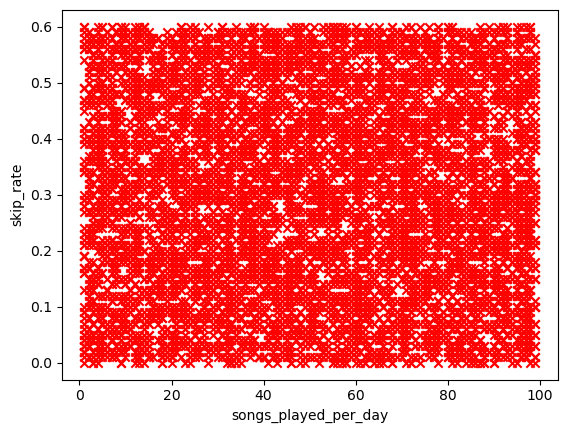

In [126]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['songs_played_per_day'][i],  " | ", y['skip_rate'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("songs_played_per_day")
plt.ylabel("skip_rate")
plt.show()

Tal como sucedió con la primera grafica, no se puede sacar nada en claro de esta relación. Se probará ahora y por ultima instancia si las canciones escuchadas en un dia y el tiempo de escucha tienen algun tipo de relación.

In [117]:
# Para X = "songs_played_per_day" y para y = "listening_time"
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = pd.DataFrame({'listening_time': file['listening_time']})

"""
e = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"],
                  'listening_time': file['listening_time']})

e.sort_values("listening_time", ascending = False)
"""

'\ne = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"],\n                  \'listening_time\': file[\'listening_time\']})\n\ne.sort_values("listening_time", ascending = False)\n'

El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 23  |  26
	 62  |  141
	 38  |  199
	 2  |  36
	 57  |  250


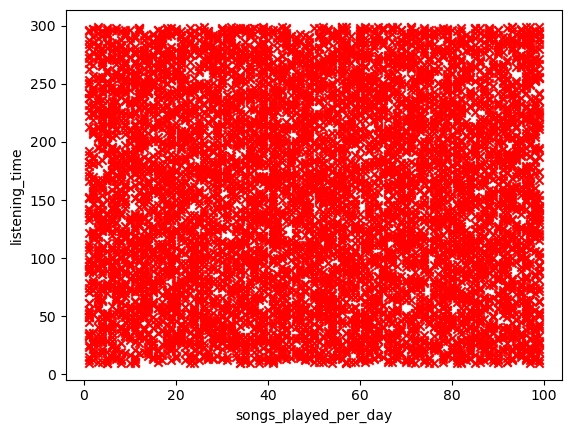

In [118]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['songs_played_per_day'][i],  " | ", y['listening_time'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("songs_played_per_day")
plt.ylabel("listening_time")
plt.show()

Volvemos a no sacar ningún dato en claro. Parece ser que hay personas que escuchas muchas canciones por muy poco tiempo y personas que escuchan pocas canciones por un tiempo prolongado, por lo que no se puede sacar ninguna relación clara.
Visto que es complicado ver una relación de manera sencilla, vamos a comparar todas las columnas contra todas para ver si entre algunas existe alguna relación clara.

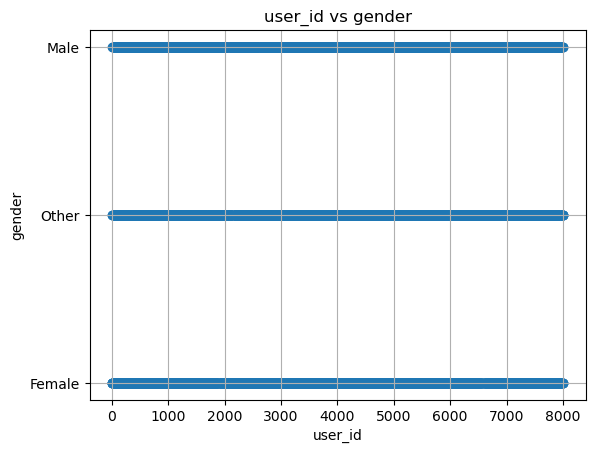

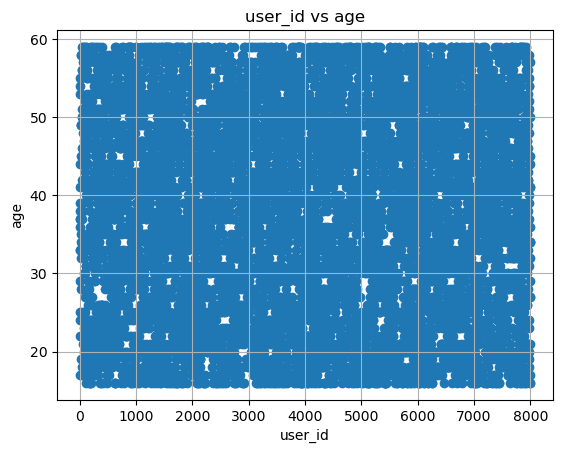

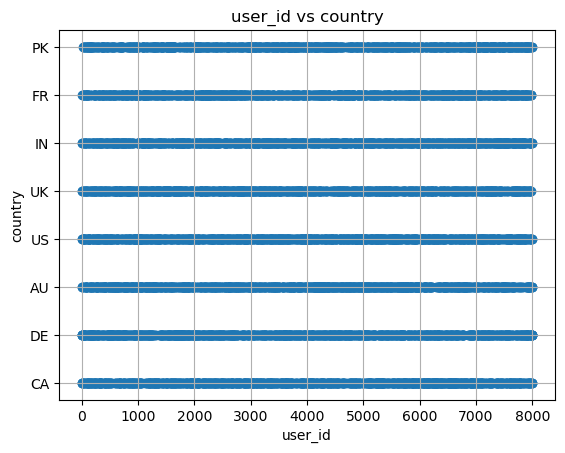

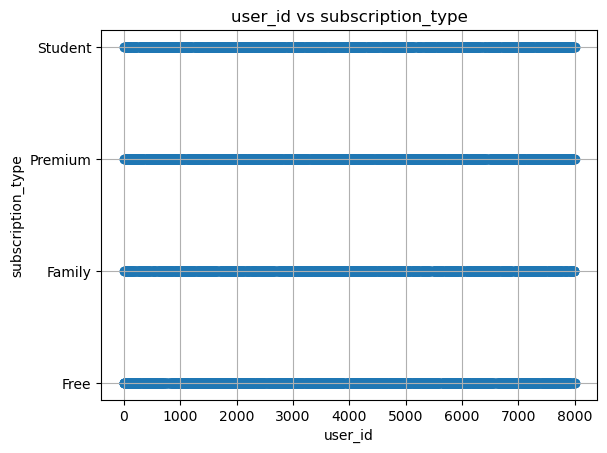

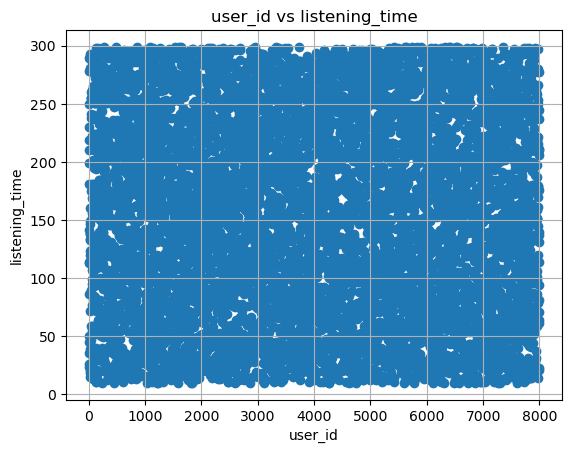

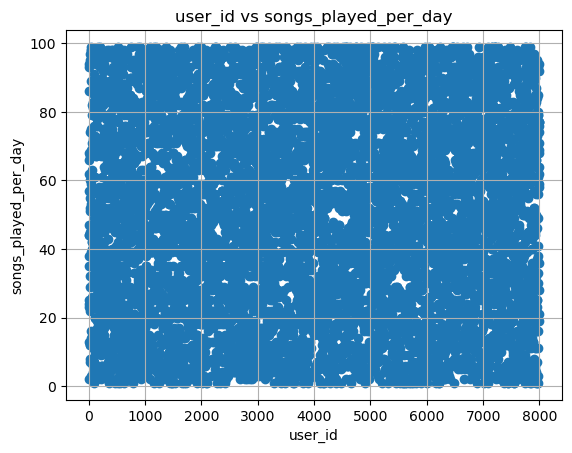

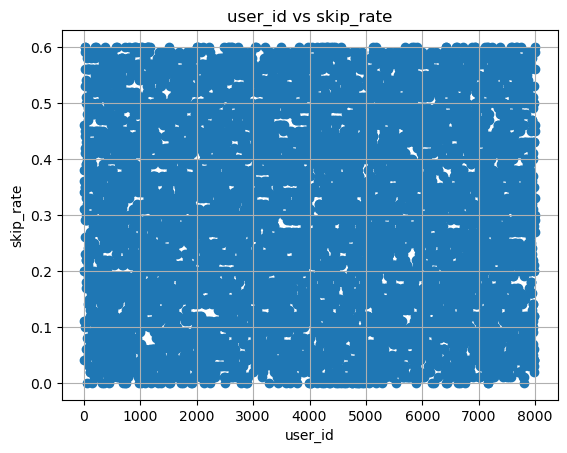

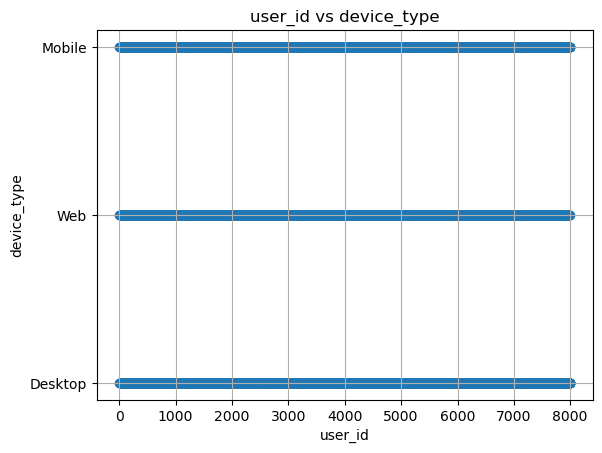

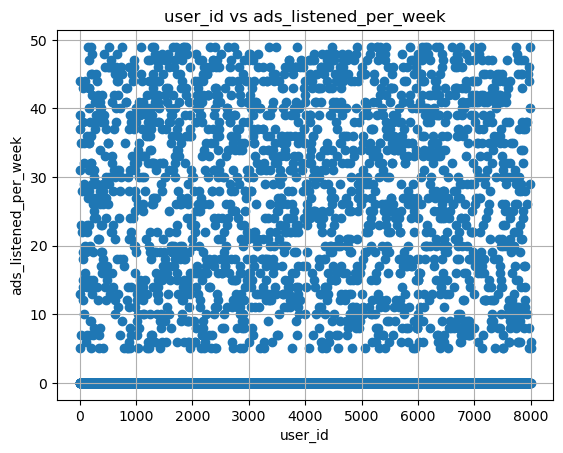

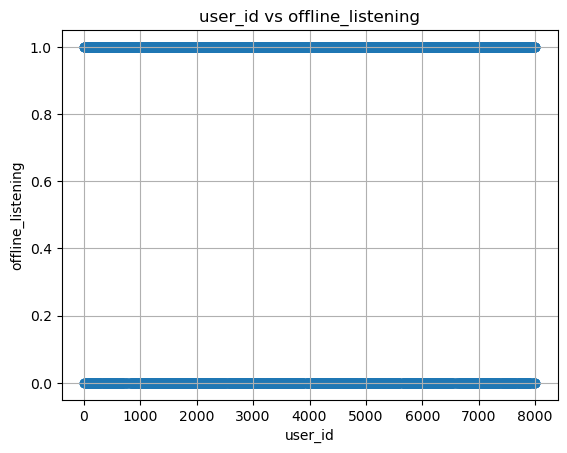

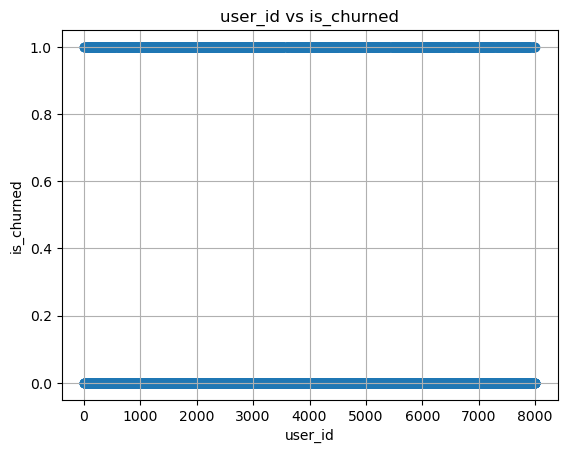

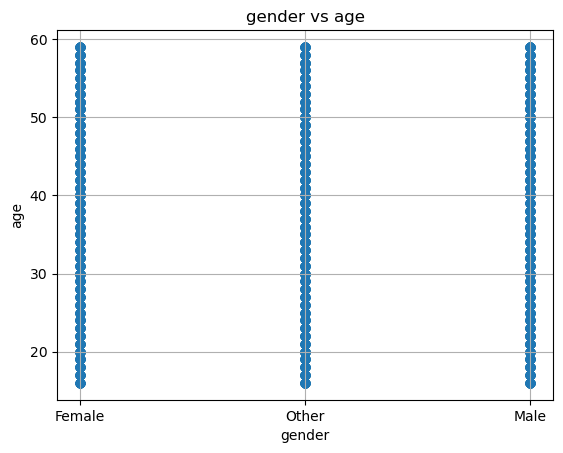

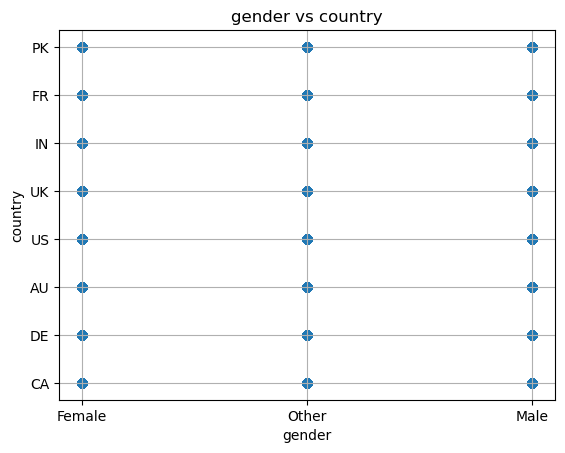

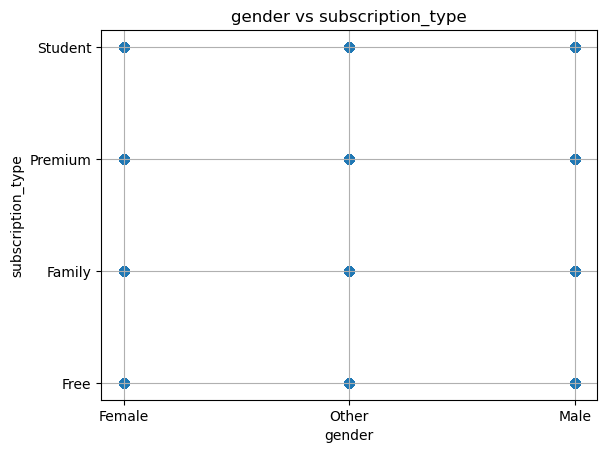

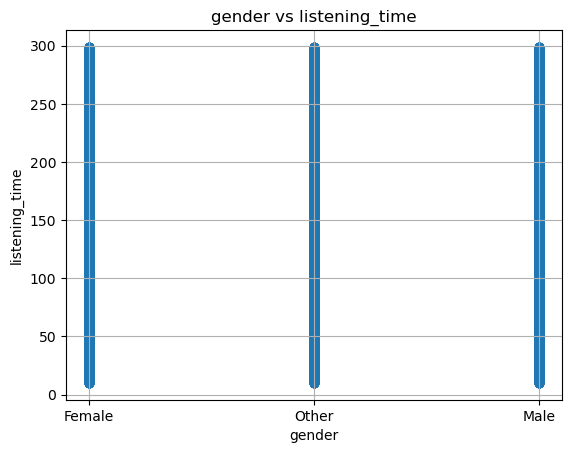

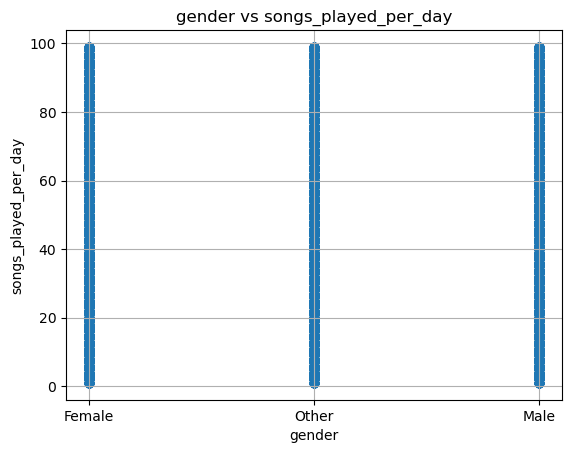

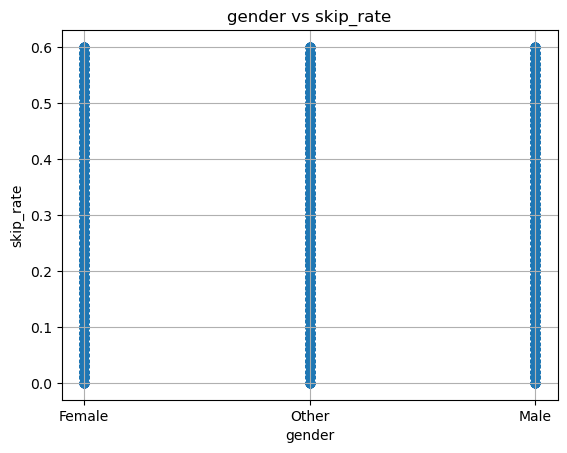

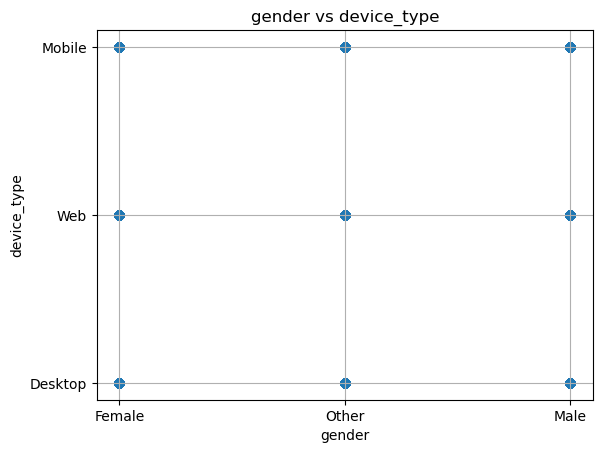

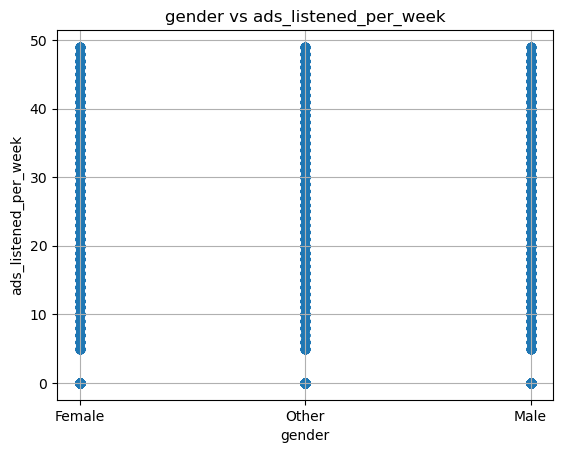

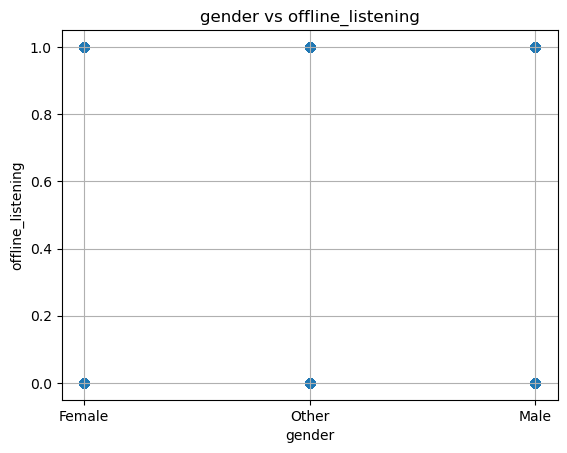

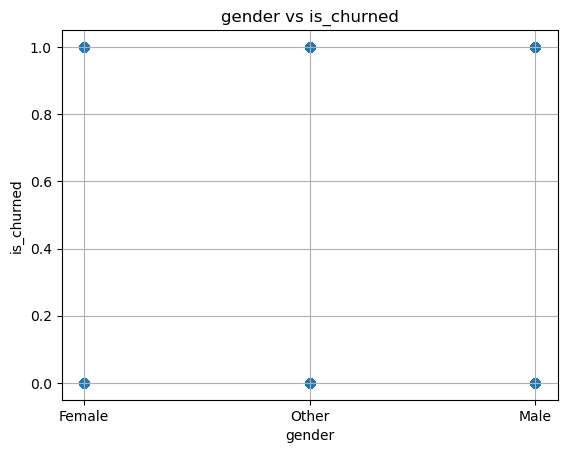

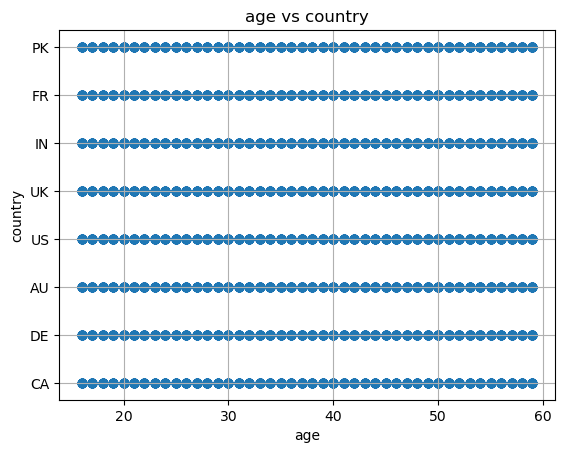

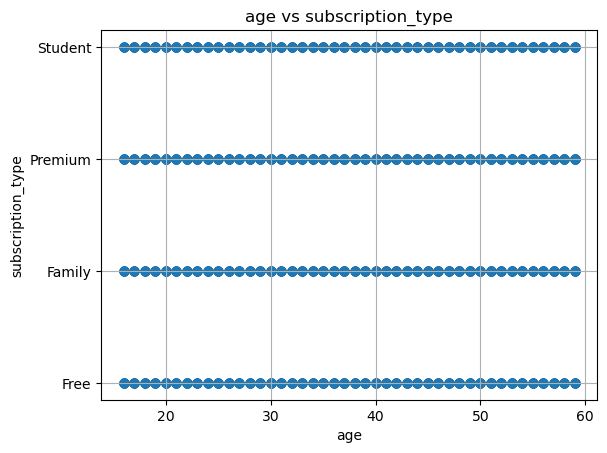

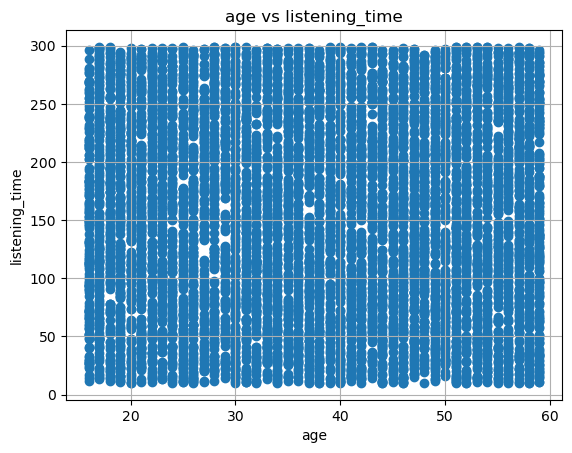

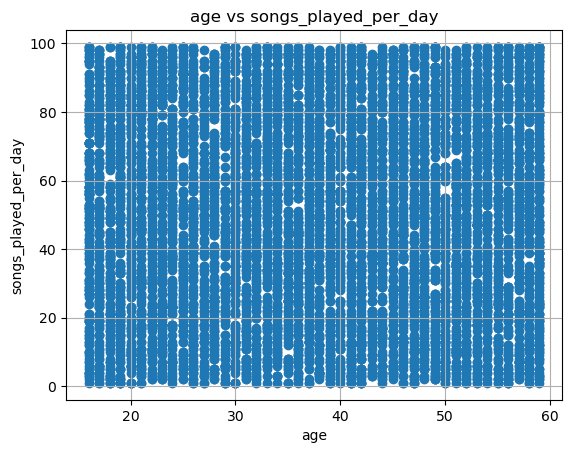

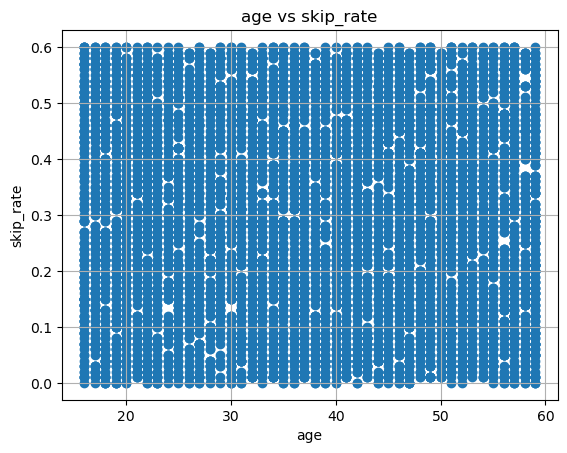

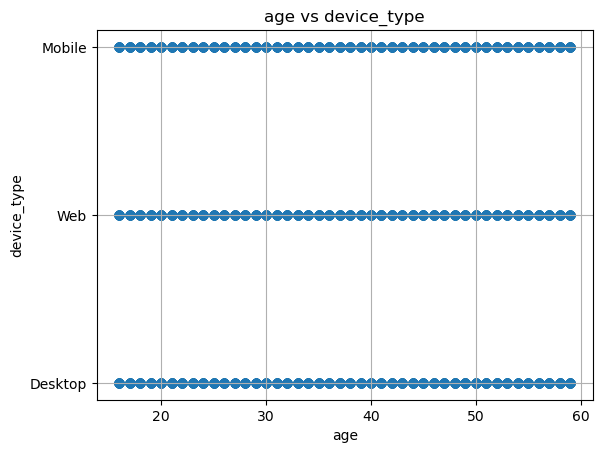

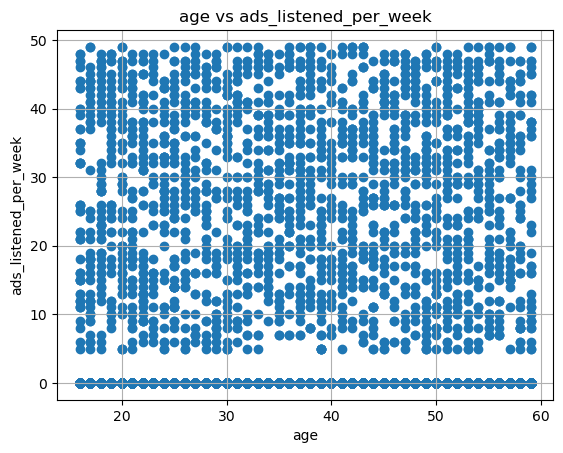

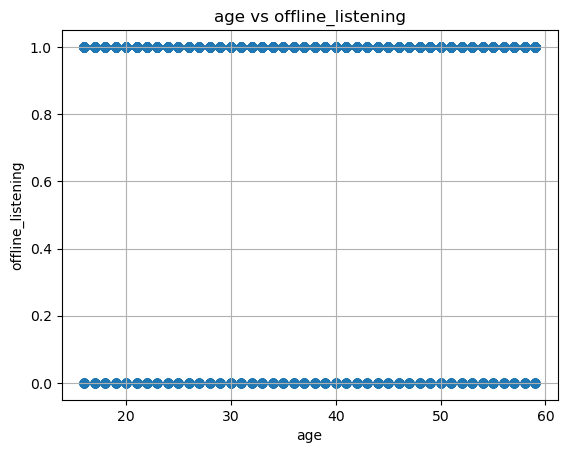

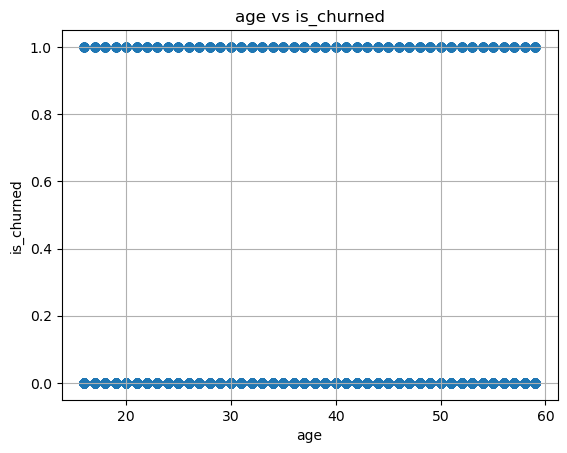

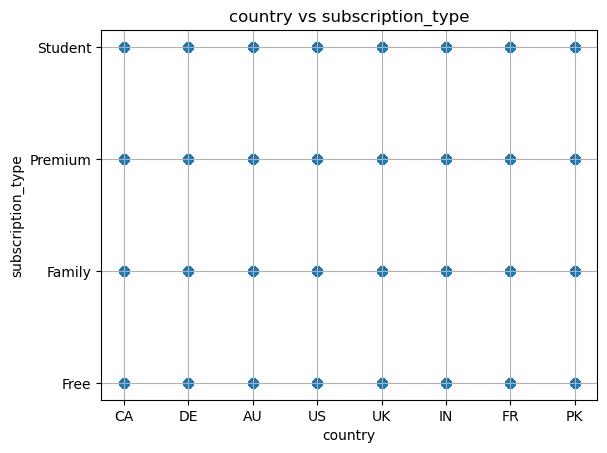

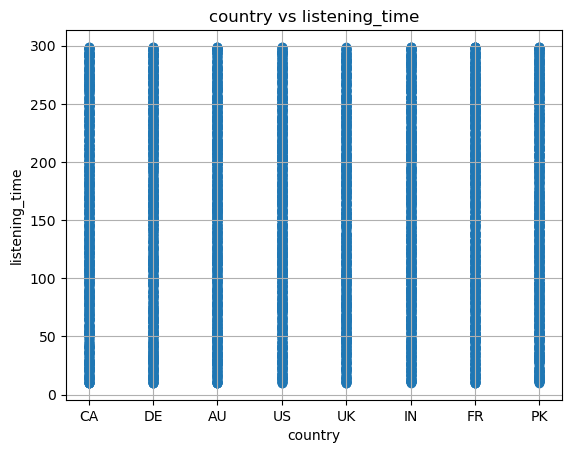

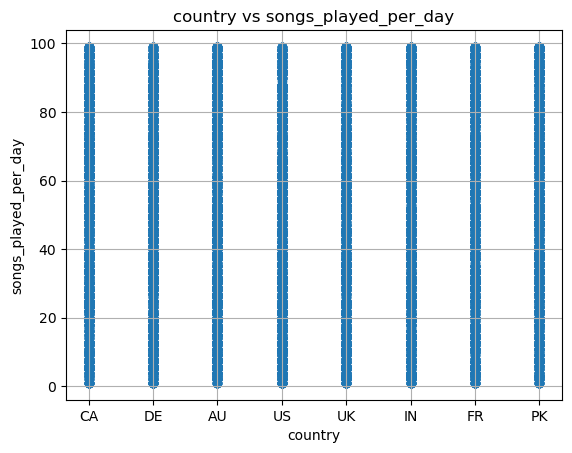

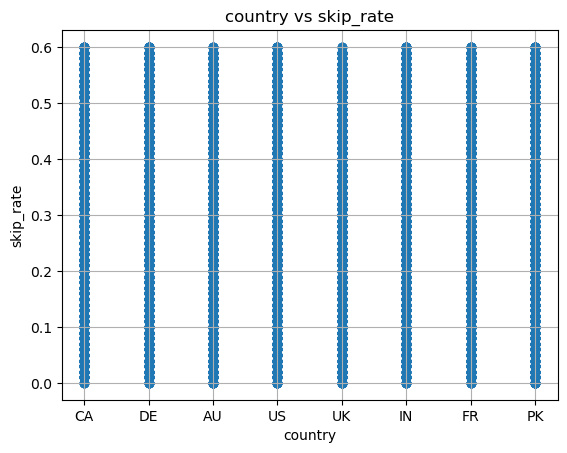

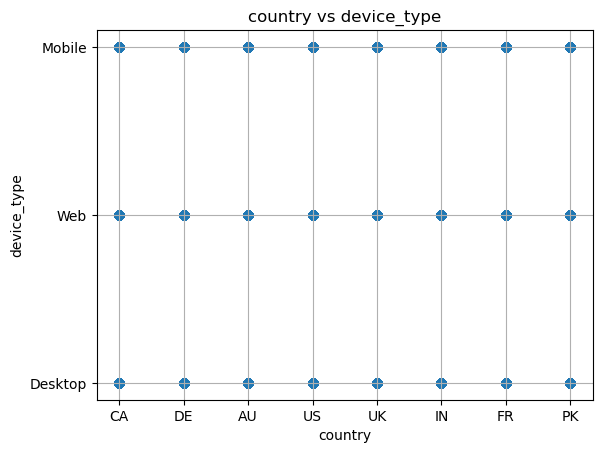

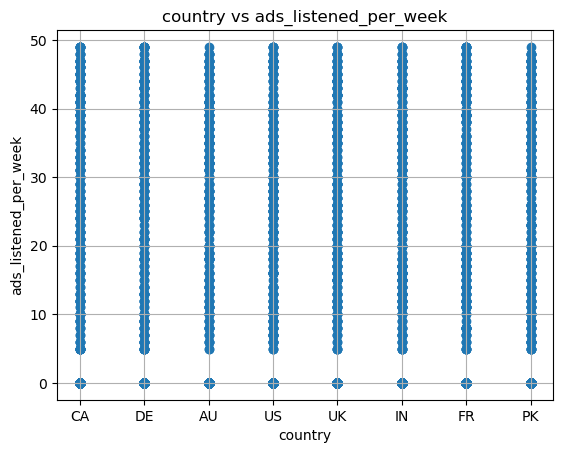

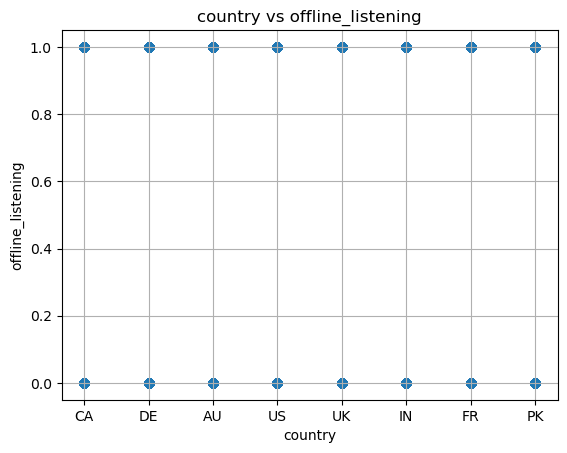

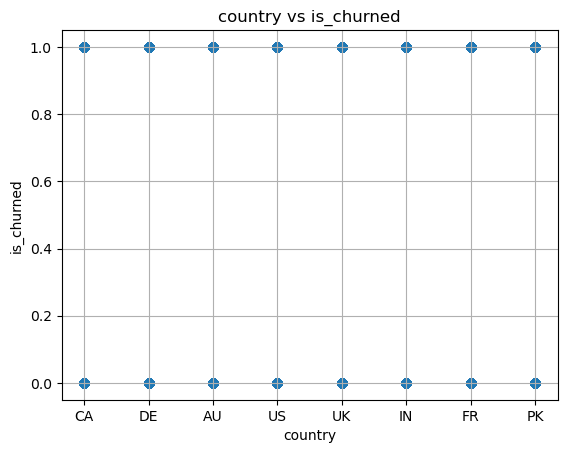

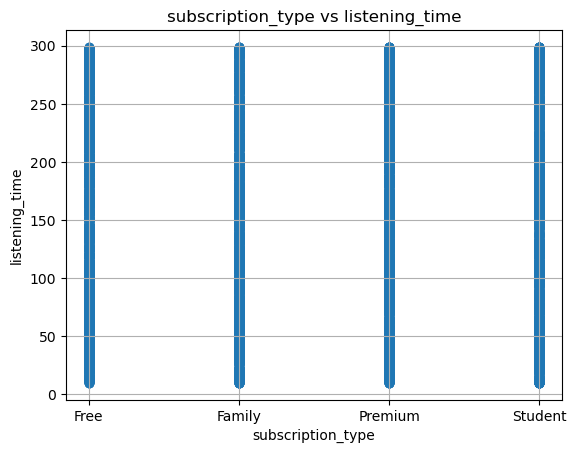

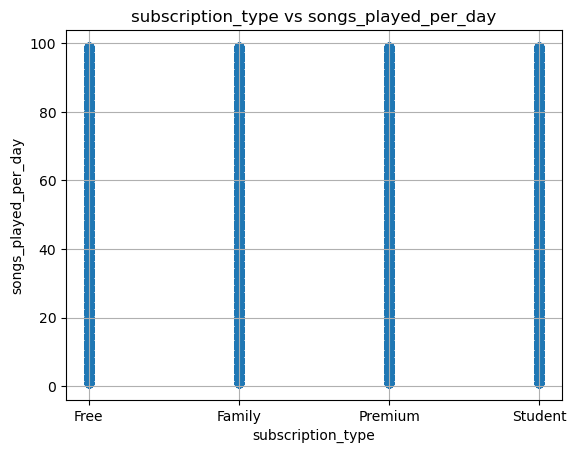

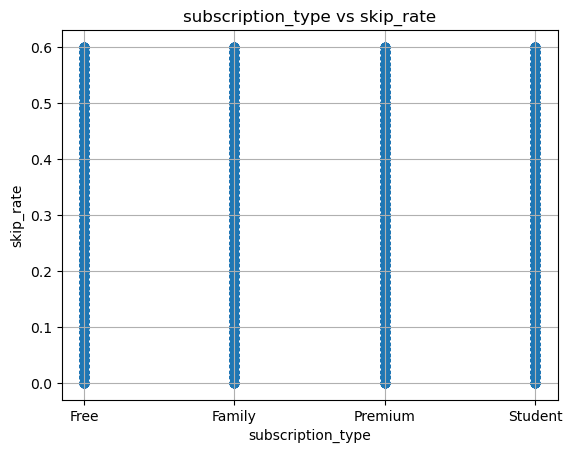

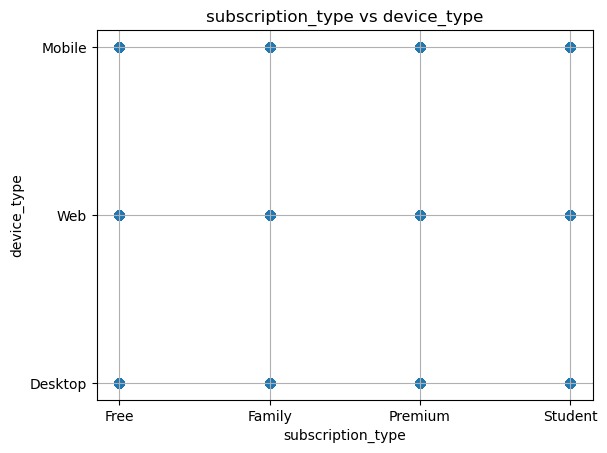

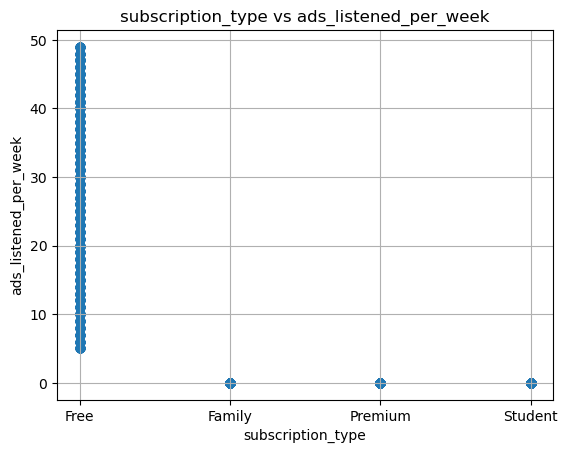

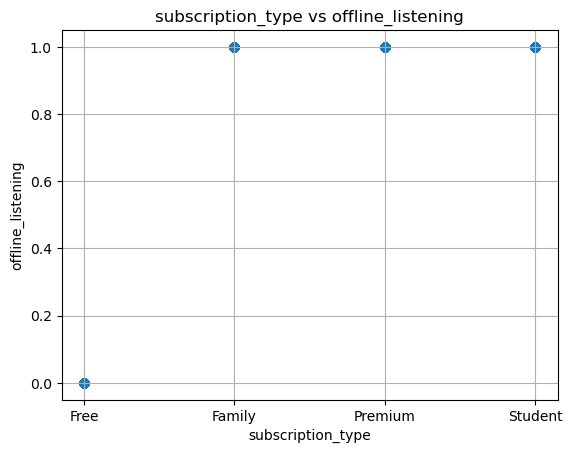

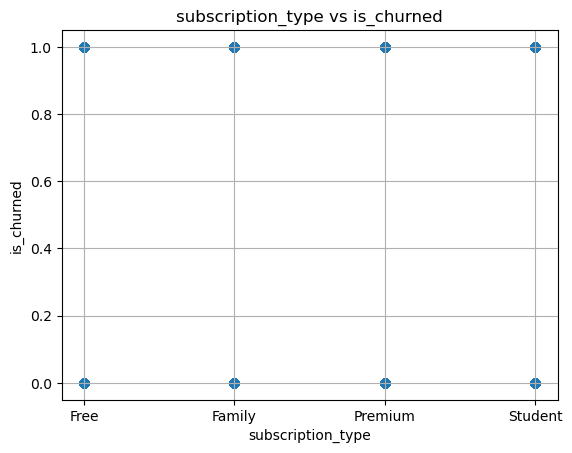

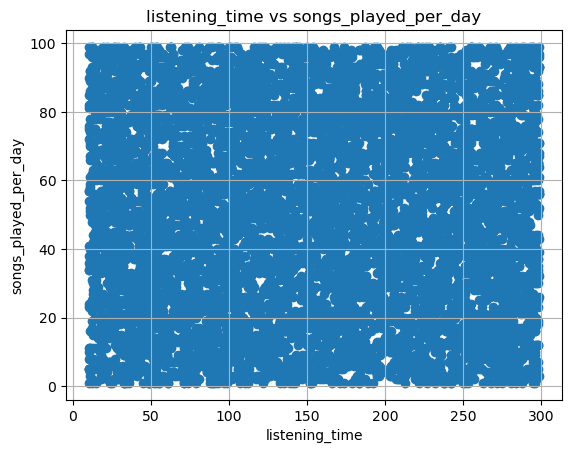

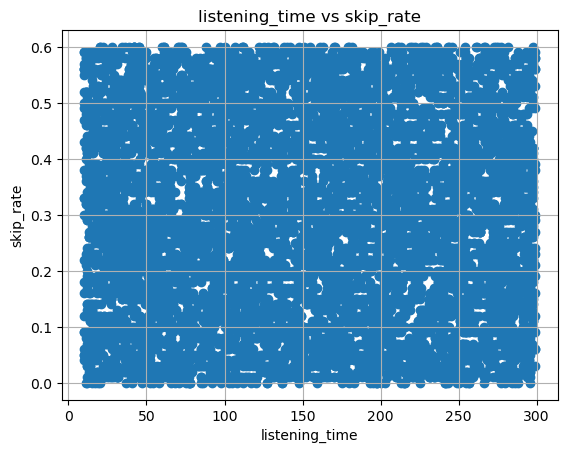

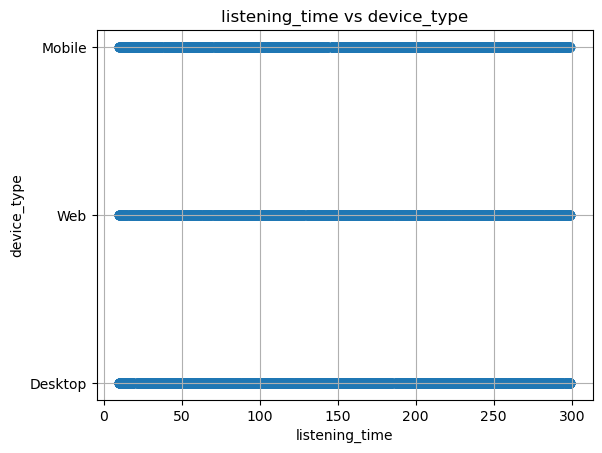

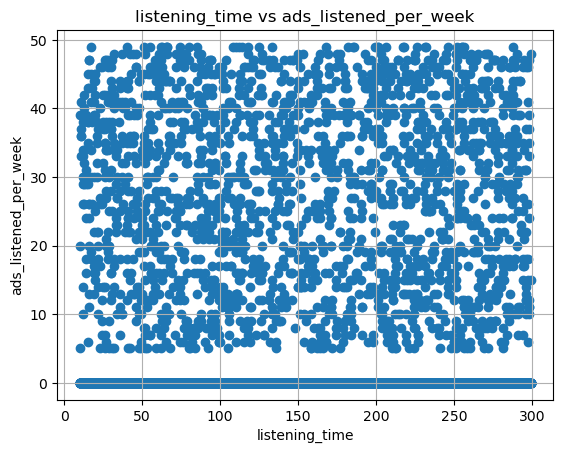

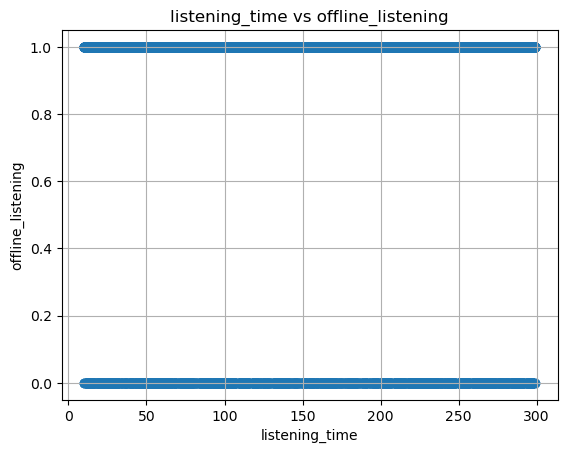

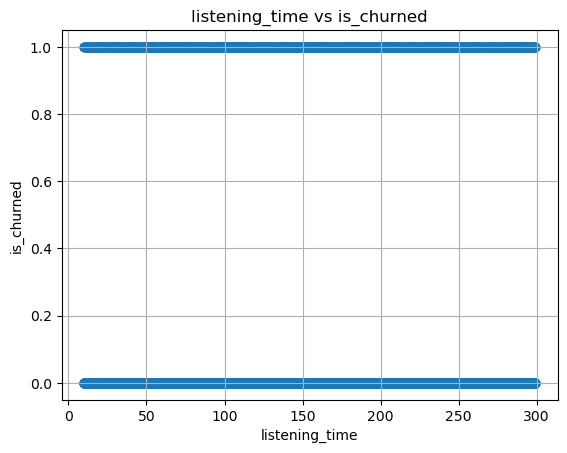

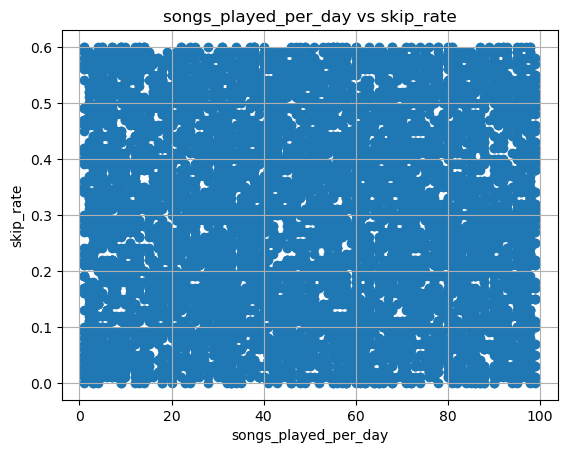

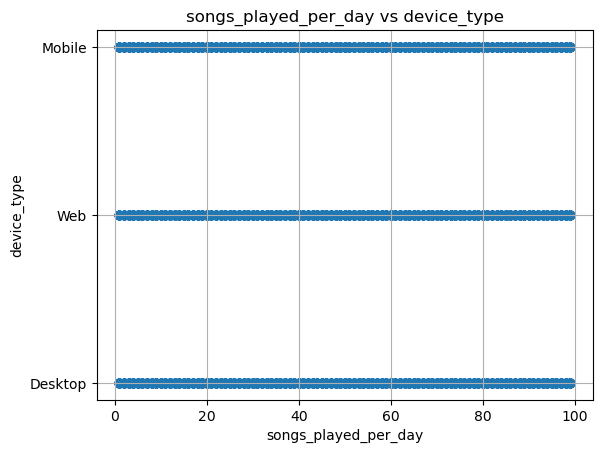

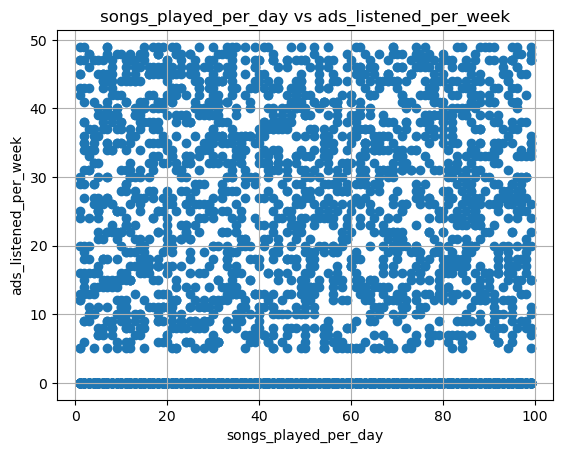

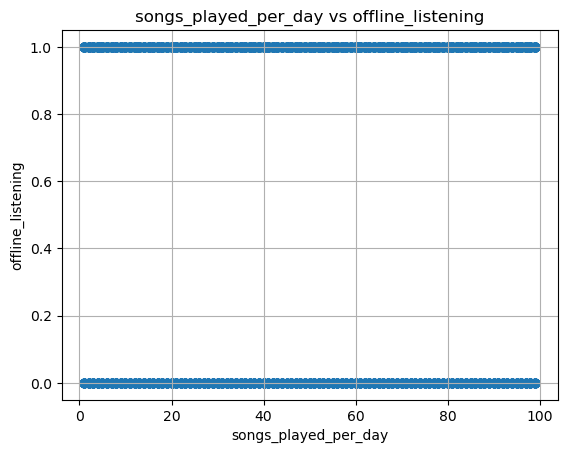

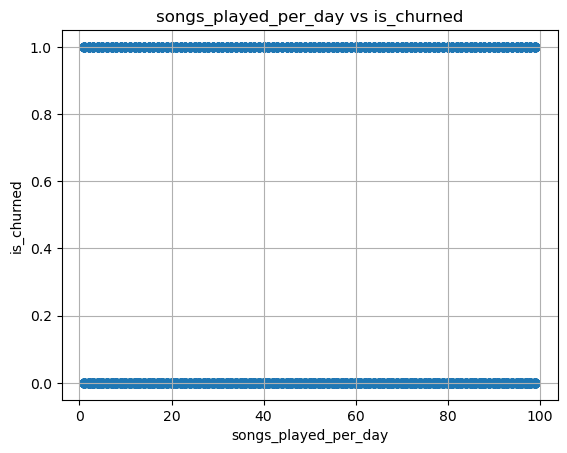

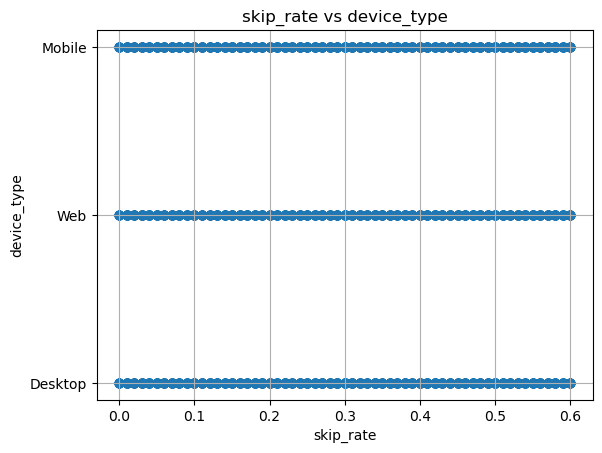

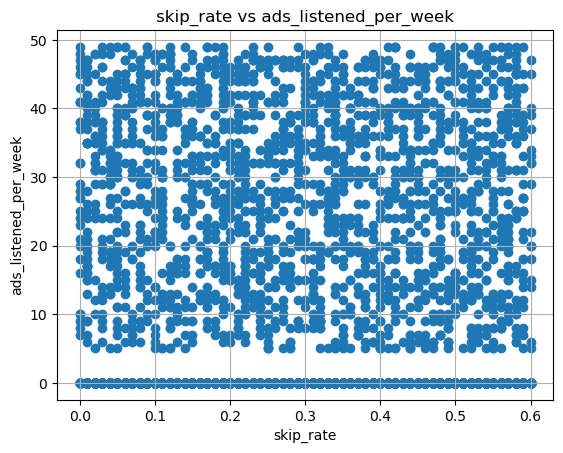

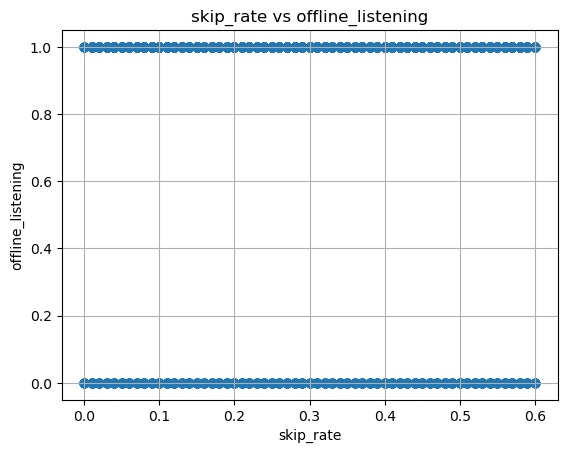

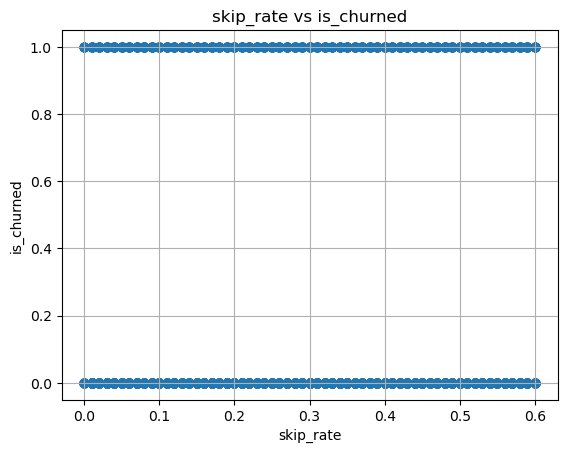

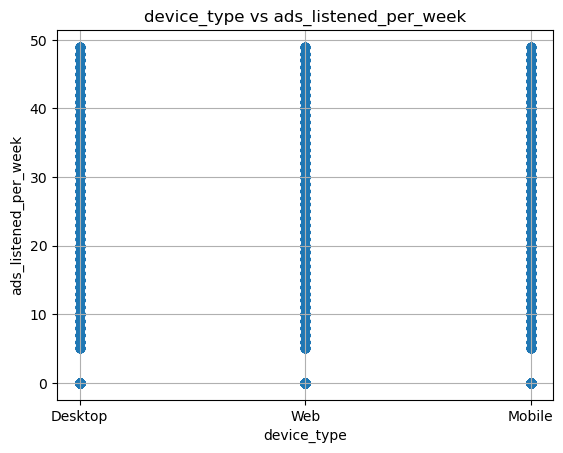

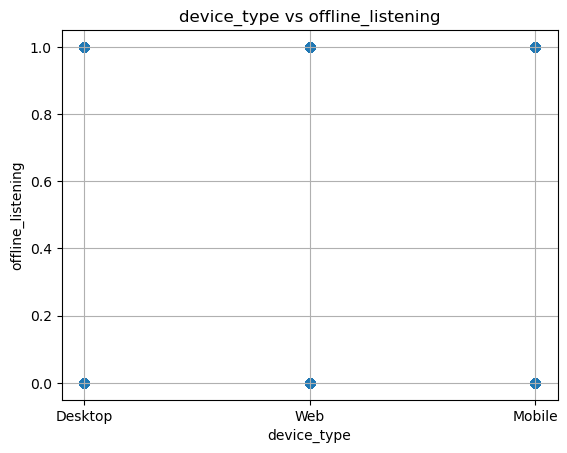

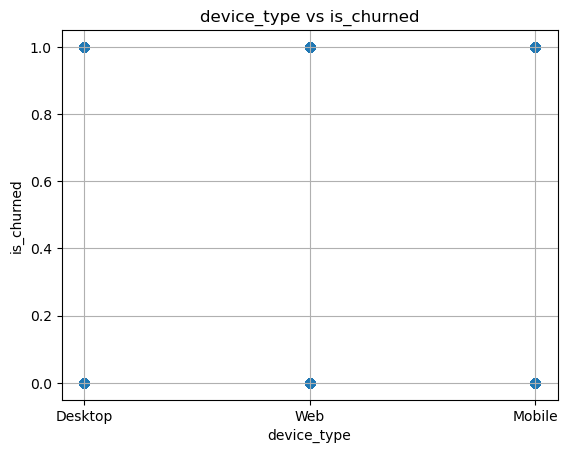

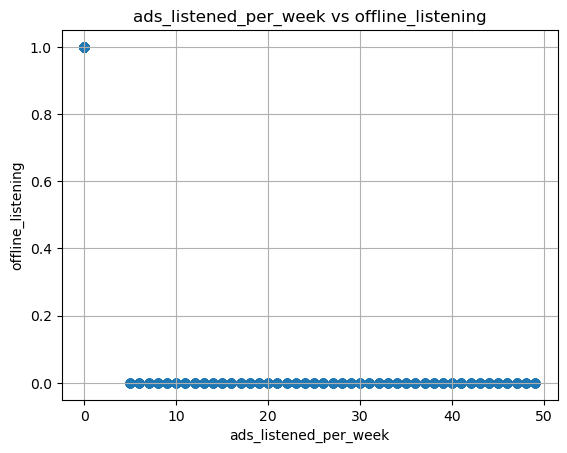

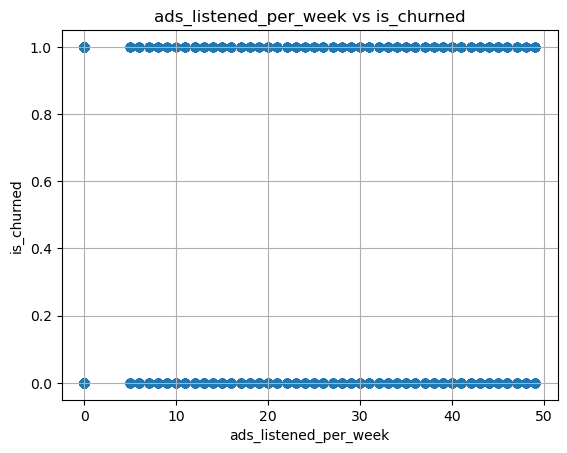

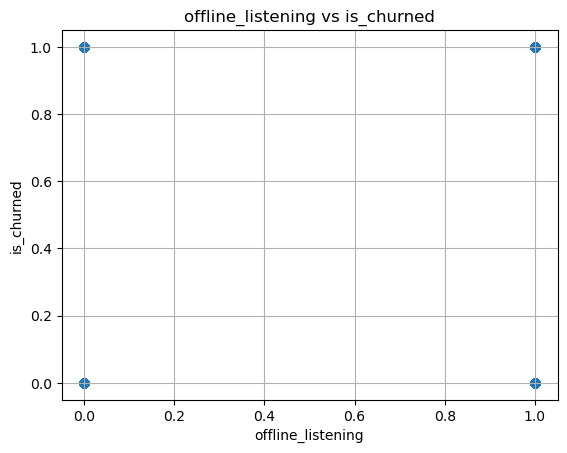

In [120]:
columnas = file.columns

# Generar los gráficos para todas las combinaciones
for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        col_x = columnas[i]
        col_y = columnas[j]

        plt.scatter(file[col_x], file[col_y])
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.title(f'{col_x} vs {col_y}')
        plt.grid(True)
        plt.show()

Tras todas estas graficas, se puede asumir que no existe ninguna relacion entre columnas, al menos comparando una contra una. Por lo tanto podemos decir que no tiene sentido implementar una regresión lineal univariable, ya que no existe ninguna columna que tenga una buena relacion con otra columna y, por tanto, que la prediga.
Se optará entonces por implementar una regresión lineal multivariable.

## Implementacion del modelo
Tras la investigación de relaciones y haber dejado claro que el modelo debe ser multivariable, se va a escoger como clase la columna "age", ya que consideramos que puede ser de utilidad para una empresa conocer la edad de sus clientes. Esta clase se va a predecir con las columnas: "listening_time", "songs_played_per_day" y "skip_rate".

Se inicializan los valores de X e y.

In [215]:
X = pd.DataFrame({"listening_time": file["listening_time"],
                  "songs_played_per_day": file["songs_played_per_day"],
                  "skip_rate": file["skip_rate"]                 
                 })
y = file["age"]
#y =  pd.DataFrame({"age" : file["age"]})

### Creación de funciones necesarias

In [216]:
def thetaInicial(tam):
    return np.zeros(tam)

def normalize(X):
    mu = X.mean()
    sigma = X.std()
    X_norm = pd.DataFrame((X - mu)/(sigma))
    return X_norm, mu, sigma

# Funcion de coste
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    J = ( 1/(2*m) ) * np.dot(np.transpose(np.dot(X, theta) - y ), np.dot(X, theta) - y )
    return J

# Funcion del gradiente
def gradientDescent(X, y, theta, alpha, iterations):
    
    m = len(y)
    J_history = []
    for current_iter in range(iterations):
        
        aux1 = np.dot (np.transpose(X), (np.dot(X, theta) - y) )
        aux2 = alpha*(1/m)* aux1
        #print("aux2:", aux2)
        #print("theta", theta)
        theta = theta - aux2
        
        current_cost = computeCost(X,y,theta)
        J_history.append(current_cost)
    return theta, J_history
    
# Funcion plot historico del coste
def mostrarHistorico(J_history):
    plt.plot(range(len(J_history)),J_history)
    plt.show()

Normalizamos los valores de X.

In [218]:
X_norm, mu, sigma = normalize(X)
#X_norm = X
print(X_norm)

      listening_time  songs_played_per_day  skip_rate
0          -1.524339             -0.953514  -0.576791
1          -0.155546              0.417323   0.229688
2           0.534802             -0.426269  -1.498481
3          -1.405313             -1.691657   0.056871
4           1.141833              0.241575   0.344899
...              ...                   ...        ...
7995        0.987099             -0.496568  -0.000734
7996       -1.107750              0.487623   1.669829
7997       -0.869699              0.417323   0.172082
7998        1.082320              1.542113  -0.173551
7999        0.665731              0.628221   0.920956

[8000 rows x 3 columns]


Introducimos la columna de unos como primera columna de X.

In [219]:
ones = np.ones((len(y), 1))
X_norm['uno'] = ones
X_norm = X_norm[['uno', 'listening_time', 'songs_played_per_day', 'skip_rate']]
print(X_norm)

      uno  listening_time  songs_played_per_day  skip_rate
0     1.0       -1.524339             -0.953514  -0.576791
1     1.0       -0.155546              0.417323   0.229688
2     1.0        0.534802             -0.426269  -1.498481
3     1.0       -1.405313             -1.691657   0.056871
4     1.0        1.141833              0.241575   0.344899
...   ...             ...                   ...        ...
7995  1.0        0.987099             -0.496568  -0.000734
7996  1.0       -1.107750              0.487623   1.669829
7997  1.0       -0.869699              0.417323   0.172082
7998  1.0        1.082320              1.542113  -0.173551
7999  1.0        0.665731              0.628221   0.920956

[8000 rows x 4 columns]


Ejecutamos la función coste

In [220]:
print(X_norm.shape, y.shape, theta.shape)
print(type(y))

(8000, 4) (8000,) (4,)
<class 'pandas.core.series.Series'>


In [221]:
J_base = computeCost(X_norm, y, theta)
print(f"El coste inicializando theta a 0: {J_base}")

El coste inicializando theta a 0: 788.4587084345267


Inicializamos los thetas y realizamos el gradiente

In [297]:
theta = thetaInicial(X_norm.shape[1])
alpha =  1.5
theta, J_history = gradientDescent(X_norm, y, theta, alpha, 200)
print(type(X_norm))
print(type(y))
print(type(theta))
print(type(alpha))
print(type(J_history))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'float'>
<class 'list'>


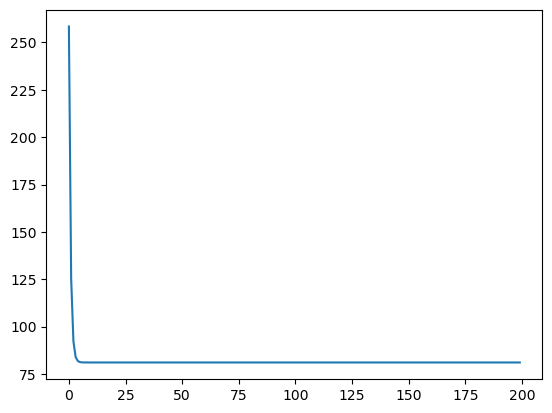

In [298]:
mostrarHistorico(J_history)

In [294]:
mu = 
sigma = 
#J = theta[0] + theta[1] * ((26-mu)/sigma) + theta[2] * ((23-mu)/sigma) + theta[3] * ((0.2-mu)/sigma)
#J = computeCost(X_norm, y, theta);
print("Coste:", J)

Coste: 81.09899679975989


### 3) Descenso del Gradiente
El método de descenso del gradiente se implementa en una función que recibe como parámetro, además de los datos X e y, los parámetros theta, alpha y el número de iteraciones. Estos dos últimos se pueden inicializar a 0.01 y 1500 respectivamente. Si la función coste es el error cuadrático, en cada iteración del descenso del gradiente se calcula:  
\begin{equation}
\theta=\theta - \alpha \frac{1}{m} (X^T \cdot (X \cdot \theta - y))
\end{equation}

La función deberá devolver los parámetros theta finales y un histórico con el coste en cada iteración que se debe visualizar. Mostrar por pantalla los valores de theta finales.


#### 3.1) Visualizar el histórico coste-iteración

#### 3.2) Visualizar el óptimo encontrado para el modelo con curvas de nivel

#### 3.3) Visualizar gráficamente el modelo obtenido

## B) EJERCICIO DE EVALUACIÓN USANDO HOLDOUT
Se divide el dataset en 70% para entrenamiento y 30% para test usando una de las funciones holdout suministradas. La función deberá devolver: X_training, y_training, X_test e y_test.
Después, obtener el modelo de regresión lineal usando el descenso del gradiente con el conjunto de entrenamiento (training) para alpha=0.01 y 1500 iteraciones. Visualizar la función coste J a través de las iteraciones. Visualizar el modelo obtenido (si es regresión lineal univariable).
Por último, predecir el conjunto de test y calcular el error.

### 1) Cargar los datos de entrada diviendo el dataset en 70-30 mediante holdout.

In [ ]:
# OPCION 1
def holdout_opcion1(X, y, percentage=0.6):
  index_training = [] # Lista vacía con los indices del training
  while len(index_training) < round(percentage*len(X)): # Mientras el número de elementos en la lista de índices del training sea menor del que debe ser:
    random_index = randrange(len(X)) # indices random dentro del rango de X
    if random_index not in index_training: # si el indice random no esta en la lista de indices del training
      index_training.append(random_index) # Añado el indice random a los indices que formarán parte del training

  # Una vez tenemos en index_training los índices que formaran parte del conjunto de training:
  X_training = X.iloc[index_training]
  y_training = y.iloc[index_training]
  X_test = X.iloc[~X.index.isin(index_training)] # ~ significa NOT
  y_test = y.iloc[~y.index.isin(index_training)] # ~ significa NOT
  print("El tamaño del training debe ser: ", round(percentage*len(X)), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  print("El tamaño del test debe ser: ", len(X)-round(percentage*len(X)), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))
  
  # Reseteamos los índices de todos los conjuntos
  X_training = X_training.reset_index(drop=True)
  y_training = y_training.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)
  
  return X_training, y_training, X_test, y_test

# OPCION 2
def holdout_opcion2(X, y, percentage=0.6):
  X_training = X.sample(round(percentage*len(X))) # Selecciona aleatoriamente el numero de filas indicado
  y_training = y.iloc[X_training.index] # Selecciona las filas del X_training
  X_test = X.iloc[~X.index.isin(X_training.index)] # ~ significa NOT
  y_test = y.iloc[~X.index.isin(X_training.index)] # ~ significa NOT

  print("El tamaño del training debe ser: ", round(percentage*len(X)), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  print("El tamaño del test debe ser: ", len(X)-round(percentage*len(X)), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))

  # Reseteamos los índices de todos los conjuntos
  X_training = X_training.reset_index(drop=True)
  y_training = y_training.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)
  
  return X_training, y_training, X_test, y_test

# OPCION 3
def holdout_opcion3(X, y, percentage=0.6):
  X_training, X_test, y_training, y_test = train_test_split(X,y, test_size=1-percentage, random_state=1) # Cuidado con el orden de la salida
  # random_state: controla el barajado aplicado a los datos antes de aplicar la división. Si le pasamos un int, la salida se reproducirá siempre que llamemos a la función
  
  print("El tamaño del training debe ser: ", round(percentage*len(X)), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  print("El tamaño del test debe ser: ", len(X)-round(percentage*len(X)), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))
  
  # Reseteamos los índices de todos los conjuntos
  X_training = X_training.reset_index(drop=True)
  y_training = y_training.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)

  return X_training, y_training, X_test, y_test

In [ ]:
# Importante: Cargar el dataset X, y si no lo tienes ya cargado.

X_training, y_training, X_test, y_test = holdout_opcion1(X, y, 0.7)
#X_training, y_training, X_test, y_test = holdout_opcion2(X, y, 0.7)
#X_training, y_training, X_test, y_test = holdout_opcion3(X, y, 0.7)

El tamaño del training debe ser:  68  - Comprobación: tamaño X_training es  68  y tamaño y_training es 68
El tamaño del test debe ser:  29  - Comprobación: tamaño X_test es  29  y tamaño y_test es 29


### 2) Hipótesis y función coste

#### 2.1) Añadir $x_0$

In [ ]:
# COMPLETAR
# Incluir x0 (antes o después de cargar el dataset X, y). 
# Tanto X_training como X_test deben incluir una columna (será x0) con todos los elementos a 1.

#### 2.2) Inicializar $\theta$

In [ ]:
# COMPLETAR

### 3) Descenso del Gradiente

In [ ]:
# COMPLETAR 
iterations = 1500
alpha = 0.01
theta_optimo_holdout, J_history_holdout = gradientDescent(....)

print('Theta encontrado con el descenso del gradiente: \n', theta_optimo_holdout)
print('\nCoste alcanzado en la última iteración : ', J_history_holdout[J_history_holdout['iteracion']==iterations-1]['coste']) 

#### 3.1) Visualizar el histórico coste-iteración
¿Ha encontrado el óptimo el descenso del gradiente?

In [ ]:
# COMPLETAR 
plotIterationsVsCost(....)

#### 3.2) Visualizar el óptimo encontrado para el modelo con curvas de nivel

In [ ]:
# COMPLETAR
plotData_cost(....)

#### 3.3) Visualizar gráficamente el modelo obtenido

In [ ]:
# COMPLETAR 
plotData_linearRegression(....)

#### 3.4) Predecir el conjunto de test usando el modelo aprendido con el conjunto de training. Calcular el error MAE y MSE.
Las métricas que usaremos están en la EB T2 diap 39: 


*   Error absoluto medio (MAE): 
\begin{equation}
MAE =\frac{1}{m}\sum_{i=1}^{m} |y_i - \widehat{y}_i|
\end{equation}
*   Error cuadrático medio (MSE): 
\begin{equation}
MSE =\frac{1}{m}\sum_{i=1}^{m} (y_i - \widehat{y}_i)^2 
\end{equation}



In [ ]:
# COMPLETAR
# Predicción de todo el conjunto de test
y_predicted = ....

In [ ]:
# COMPLETAR
# Calcular los errores
m = len(y_test)

# MAE: 
error_absoluto_medio_holdout = ....
print("El error absoluto medio es: ", error_absoluto_medio_holdout)
MAE_sklearn_holdout = metrics.mean_absolute_error(y_test, y_predicted)
print("El error absoluto medio usando sklearn es: ", MAE_sklearn_holdout)

# MSE: 
error_cuadratico_medio_holdout = ....
print("\n\nEl error cuadrático medio es: ", error_cuadratico_medio_holdout)
MSE_sklearn_holdout = metrics.mean_squared_error(y_test, y_predicted)
print("El error cuadrático medio usando sklearn es: ", MSE_sklearn_holdout)

## C) EJERCICIO DE EVALUACIÓN USANDO CROSS-VALIDATION
La evaluación mediante validación cruzada consiste en la división del conjunto de datos en K bolsas, haciendo que cada una de estas bolsas sea el conjunto de test mientras que las K-1 restantes sean el conjunto de entrenamiento. 

De esta forma, se calculan K modelos y el error que cada uno de ellos comete al predecir el conjunto de test correspondiente. 

La media de los K errores es el error que determina si la regresión lineal es un buen método de aprendizaje y la predicción de una instancia desconocida se estimaría con la media de la predicción obtenida por cada modelo. 

#### 1) Cargar los datos de entrada y dividirlo en los conjuntos de entrenamiento y test mediante validación cruzada.
Usar una de las siguientes funciones para construir los índices que nos ayudarán a crear las diferentes bolsas en las que se dividirá el conjunto de datos.

In [ ]:
def cross_validation_opcion1(X, y, K):
  tam_folds = round(len(X)/K) # Tamaño de cada bolsa considerando que creamos K bolsas
  data_particiones = [] # Lista que devolveremos con los índices de cada bolsa
  all_bolsa = [] # Lista de indices totales en el que vamos a añadir todos los índices que se van incluyendo en data_particiones para controlar que no se repiten
  for i in range(K): # Para cada bolsa
    fold = [] # Lista vacío con los indices de la bolsa, deberá tener tamaño tam_folds
    while len(fold) < tam_folds:
      random_index = randrange(len(X)) # indices random dentro del rango de X
      if random_index not in all_bolsa: # si el indice random no esta en la lista de indices totales
        fold.append(random_index) # Añado el indice random a los indices que formaran parte de la bolsa
        all_bolsa.append(random_index) # Añado el indice random a la lista de indices totales
    data_particiones.append(fold) # Cuando fold ya esté correctamente completado, antes de pasar a la siguiente bolsa, se añadirán todos esos índices a la lista que devolveremos
  return data_particiones

def cross_validation_opcion2(X, y, K):
  cv = KFold(n_splits=K, random_state=None, shuffle=True) # random_state como anteriormente, shuffle = True: Se barajan los datos antes de divirlos en lotes
  data_particiones_sk = [] # Lista vacía donde añadiremos los índices del test cada bolsa
  for train_ix, test_ix in cv.split(X): # cv.split(X) genera índices para dividir los datos en training y test
    data_particiones_sk.append(test_ix)
  return data_particiones_sk

In [ ]:
K = 5 # Número de particiones para cross-validation

indices = cross_validation_opcion1(X,y,K) # indices serán los índices del conjunto de test
#indices = cross_validation_opcion2(X,y,K) # indices serán los índices del conjunto de test

### 2) Hipótesis y función coste

#### 2.1) Añadir $x_0$

In [ ]:
# COMPLETAR

#### 2.2) Inicializar $\theta$

In [ ]:
# COMPLETAR

### 3) Descenso del Gradiente considerando cross-validation
Una vez creados los conjuntos, obtener el modelo y el error para cada uno de ellos. Para obtener el modelo, ejecutar el descenos del gradiente llamando a la función correspondiente con el conjunto de entrenamiento correspondiente.

In [ ]:
iterations = 1500 # Inicialización de alpha y número de iteraciones
alpha = 0.01

In [ ]:
# COMPLETAR 
error_abs = [] # Lista vacía para almacenar los errores de cada conjunto train/test y luego calcular el error medio cometido
arr_J_history = [] # Lista vacía para almacenar los J_history de cada conjunto train/test y luego poder visualizar la función coste J a través de las iteraciones de cada modelo
arr_theta_optimo = [] # Lista vacía para almacenar los theta optimos de cada conjunto train/test
arr_id_bolsa = [] # Lista vacía para almacenar el id de la bolsa con los índices de cada conjunto train/test
arr_X_training = [] # Lista vacía para almacenar cada conjunto de training X
arr_y_training = [] # Lista vacía para almacenar cada conjunto de training y

for i in range(0,K): # Para cada bolsa
  print("\nBOLSA: ", i)
  # Crear los conjuntos test/training
  X_test = ....
  y_test = ....
  X_training = ....
  y_training = ....

  #print("El tamaño del training debe ser: ",len(X)-round(len(X)/K), " - Comprobación: tamaño X_training es ", len(X_training), " y tamaño y_training es", len(y_training))
  #print("El tamaño del test debe ser: ", round(len(X)/K), " - Comprobación: tamaño X_test es ", len(X_test), " y tamaño y_test es", len(y_test))

  # Reseteamos los índices de todos los conjuntos
  X_training = ....
  y_training = ....
  X_test = ....
  y_test = ....


  # Descenso del gradiente
  theta_optimo_cv, J_history_cv = gradientDescent(.....)
  print('\tTheta encontrado con el descenso del gradiente: \n', theta_optimo_cv)
  print('\n\tCoste alcanzado en la última iteración : ', J_history_cv[J_history_cv['iteracion']==iterations-1]['coste']) 
  arr_theta_optimo.append(....) # Añadir theta_optimo_cv a la lista de theta optimos
  arr_J_history.append(....) # Añadir J_history_cv a la lista de J_history
  arr_id_bolsa.append(....) # Añadir el id de la bolsa que se está recorriendo a la lista de ids
  arr_X_training.append(....) # Añadir el X_training a la lista de X_training
  arr_y_training.append(....) # Añadir el y_training a la lista de y_training

  # Predicción de todo el conjunto de test
  y_predicted = .... 

  # Errores
  MAE_sklearn_cv = metrics.mean_absolute_error(y_test, y_predicted)
  print("\tEl error absoluto medio usando sklearn es: ", MAE_sklearn_cv)
  MSE_sklearn_cv = metrics.mean_squared_error(y_test, y_predicted)
  print("\tEl error cuadrático medio usando sklearn es: ", MSE_sklearn_cv)
  error_abs.append(MAE_sklearn_cv) # Añadir MAE a la lista de errores

  print("--------------")

print("\n\nFIN\n\nError medio usando descenso del gradiente: ", ....)
df_cv = .... # Crear dataframe con todo lo necesario para poder realizar las visualizaciones que se nos piden a continuación: ids, thetas optimos, J_history, ....

#### 3.1) Visualizar el histórico coste-iteración
De cada conjunto training/test

In [ ]:
# COMPLETAR

#### 3.2) Visualizar el óptimo encontrado para el modelo con curvas de nivel
De cada conjunto training/test

In [ ]:
# COMPLETAR

#### 3.3) Visualizar gráficamente el modelo obtenido
De cada conjunto training/test

In [ ]:
# COMPLETAR